# Analysing protein ligand structures by using CSD python API

In [1]:
import os

import ccdc.io
import ccdc.conformer 
import ccdc.diagram


from IPython.display import Image
from IPython.display import display
from ccdc.protein import Protein
from ccdc.diagram import DiagramGenerator
diagram_generator = DiagramGenerator()
from ccdc import io
from IPython.display import display 
from PIL import Image, ImageDraw, ImageFont

import ccdc.search
from ccdc import conformer
from ccdc import io

import os
import ccdc.io
import ccdc.search
from ccdc.pharmacophore import Pharmacophore

from ccdc.docking import Docker
from ccdc.protein import Protein
from ccdc.io import EntryReader, EntryWriter, MoleculeReader

from ccdc.cavity import Cavity
from ccdc.interaction import InteractionMapAnalysis
from ccdc.utilities import Grid

Let's read a PDB file of an entry

In [2]:
file_2iea = 'pdb2iea.ent'

In [3]:
p_2iea = Protein.from_file(file_2iea)

Find out the contents of this entry

In [4]:
print("Protein has {} chains and {} residues.".format(len(p_2iea.chains),len(p_2iea.residues)))
for chain in p_2iea.chains:
    print("Chain {} has {} residues.".format(chain.identifier, len(chain.residues)))

Protein has 2 chains and 1602 residues.
Chain A has 801 residues.
Chain B has 801 residues.


The sequence will be given in a single output one chain after another chain with space separated. 

In [5]:
print(p_2iea.sequence)

ISNYINTIPVEEQPEYPGNLELERRIRSAIRWNAIMTVLRASKKDLELGGHMASFQSSATIYDVCFNHFFRARNEQDGGDLVYFQGHISPGVYARAFLEGRLTQEQLDNFRQEVHGNGLSSYPHPKLMPEFWQFPTVSMGLGPIGAIYQAKFLKYLEHRGLKDTSKQTVYAFLGDGEMDEPESKGAITIATREKLDNLVFVINCNLQRLDGPVTGNGKIINELEGIFEGAGWNVIKVMWGSRWDELLRKDTSGKLIQLMNETVDGDYQTFKSKDGAYVREHFFGKYPETAALVADWTDEQIWALNRGGHDPKKIYAAFKKAQETKGKATVILAHTIKGYGMGDAAMDGVRHIRDRFNVPVSDADIEKLPYITFPEGSEEHTYLHAQRQKLHGYLPSRQPNFTEKLELPSLQDFGALLEEQSKEISTTIAFVRALNVMLKNKSIKDRLVPIIADEARTFGMEGLFRQIGIYSPEDEKGQILQEGINELGAGCSWLAAATSYSTNNLPMIPFYIYYSMFGFQRIGDLCWAAGDQQARGFLIGGTSGRTTLNGEGLQHEDGHSHIQSLTIPNCISYDPAYAYEVAVIMHDGLERMYGEKQENVYYYITTLNENYHMPAMPEGAEEGIRKGIYKLETIEGSKGKVQLLGSGSILRHVREAAEILAKDYGVGSDVYSVTSFTELARDGQDCERWNMLHPLETPRVPYIAQVMNDAPAVASTDYMKLFAEQVRTYVPADDYRVLGTDGFGRSDSRENLRHHFEVDASYVVVAALGELAKRGEIDKKVVADAIAKFNIDADKVNPRLA ISNYINTIPVEEQPEYPGNLELERRIRSAIRWNAIMTVLRASKKDLELGGHMASFQSSATIYDVCFNHFFRARNEQDGGDLVYFQGHISPGVYARAFLEGRLTQEQLDNFRQEVHGNGLSSYPHPKLMPEFWQFPTVSMGLGPIGAIYQAKFLKYLEHRGLKDTSKQTVYAFLGDGEMDEPESKGAITIATREKLDNL

We can also check the number of water molecules and if there is any metal atom present in this entry

In [6]:
print('{} has {} waters and {} metals'.format(p_2iea.identifier, len(p_2iea.waters), len(p_2iea.metals)))

2IEA has 682 waters and 2 metals


In [7]:
print(p_2iea.metals)

(Atom(MG), Atom(MG))


We can also perform a chain superposition and find out the rmsd 

In [8]:
chain_superposition = Protein.ChainSuperposition()
(rmsd, transformation) = chain_superposition.superpose(p_2iea.chains[0], p_2iea.chains[1])

In [12]:
print('chain overlay rmsd is {}'.format(round(rmsd, 2)))

chain overlay rmsd is 0.19


In [14]:
print("There are {} bound ligands present.".format(len([l for l in p_2iea.ligands])))

There are 0 bound ligands present.


There is no bound ligands. We can find out if there is any cofactors presnt in this entry or not

In [15]:
print("There are {} cofactors presnt.".format(len([l for l in p_2iea.cofactors])))

There are 2 cofactors presnt.


A:TDP887


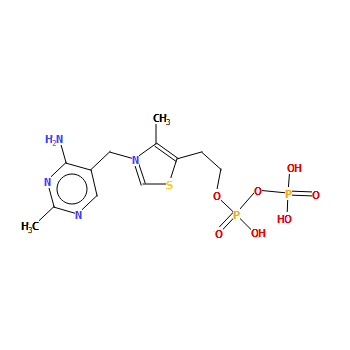

B:TDP887


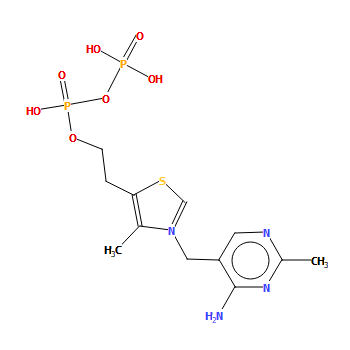

In [12]:
for x in p_2iea.cofactors:
    print(x.identifier)
    img = diagram_generator.image(x)
    display(img)
    

### Binding site generation and superposition of chains

We can create binding site from a ligand, from a residue or from an atom of a residue. We ll create a binding site around TDP887 of chain A.

In [13]:
binding_site_tdp = Protein.BindingSiteFromMolecule(p_2iea, p_2iea.cofactors[0], 6.)

We can extract some information about the binding site, like what are the residues, what are the ligands and cofactors etc. 

In [14]:
print(binding_site_tdp.residues)

(Residue(A:MET194), Residue(A:SER193), Residue(A:GLY195), Residue(B:GLU522), Residue(A:GLN140), Residue(B:ALA520), Residue(A:HIS142), Residue(B:ASP521), Residue(B:TYR599), Residue(A:VAL268), Residue(B:ILE569), Residue(A:LEU264), Residue(B:ARG606), Residue(A:ASN260), Residue(B:PHE602), Residue(A:GLN262), Residue(B:GLU571), Residue(A:ARG263), Residue(B:HIS640), Residue(A:ASN258), Residue(A:ASP230), Residue(A:GLU232), Residue(A:GLY231), Residue(A:ASP609), Residue(A:GLY229), Residue(A:LEU228), Residue(A:MET233), Residue(A:GLU235), Residue(A:LYS392), Residue(A:SER112), Residue(A:HIS106), Residue(A:SER109), Residue(A:VAL192))


In [15]:
print([l.identifier for l in binding_site_tdp.cofactors])

['A:TDP887']


It is also possible to perform a binding site superposition. Next example shows for two chains present in this entry. 

In [16]:
(rmsd_binding_site, transformation_binding_site) = chain_superposition.superpose(p_2iea.chains[0], p_2iea.chains[1], binding_site_tdp)

In [17]:
print('binding site overlay rmsd is {:6.4f}'.format(rmsd_binding_site))

binding site overlay rmsd is 0.1023


In a similar way we can superpose similar chains from different PDB entry. 

### Geometry analysis by Mogul.

In [18]:
engine = conformer.GeometryAnalyser()

In [19]:
ligand_tdp = p_2iea.cofactors[0]
geometry_analysed_mol = engine.analyse_molecule(ligand_tdp)

In [20]:
for tor in geometry_analysed_mol.analysed_torsions:
    if tor.unusual:
        print('%s %d %.2f' % (str(tor.atom_labels), tor.nhits, tor.local_density))
        

['O5G', 'C5B', 'C5A', 'C5'] 46 2.17
['O21', 'P2', 'O11', 'P1'] 47 4.26


In [21]:
for bond in geometry_analysed_mol.analysed_bonds:
    if bond.unusual:
        print('%s %d %.2f' % (str(bond.atom_labels), bond.nhits, bond.local_density))

["C2'", "N1'"] 75 4.00
["C4'", "N3'"] 1002 0.70
["C5'", "C4'"] 306 0.33
['P1', 'O11'] 19 10.53


In [22]:
for angle in geometry_analysed_mol.analysed_angles:
    if angle.unusual:
        print('%s %d %.2f' % (str(angle.atom_labels), angle.nhits, angle.local_density))

["C6'", "N1'", "C2'"] 73 8.22


### Cavity search

Cavities can be extracted from a protein using the algorithm described in “LIGSITE.

In [23]:
protein_cavities = Cavity.from_pdb_file('pdb2iea.ent')

In [24]:
print([c.identifier for c in protein_cavities])

['pdb2iea.17', 'pdb2iea.16', 'pdb2iea.15', 'pdb2iea.14', 'pdb2iea.13', 'pdb2iea.12', 'pdb2iea.11', 'pdb2iea.10', 'pdb2iea.9', 'pdb2iea.8', 'pdb2iea.7', 'pdb2iea.6', 'pdb2iea.5', 'pdb2iea.4', 'pdb2iea.3', 'pdb2iea.2', 'pdb2iea.1']


In [25]:
print(protein_cavities[0].volume)

4512.125


In [26]:
print(protein_cavities[0].ligand_identifiers)

('A:TDP',)


In [27]:
protein_cavities[0].to_pymol_file('test_cavity_2iea.py')

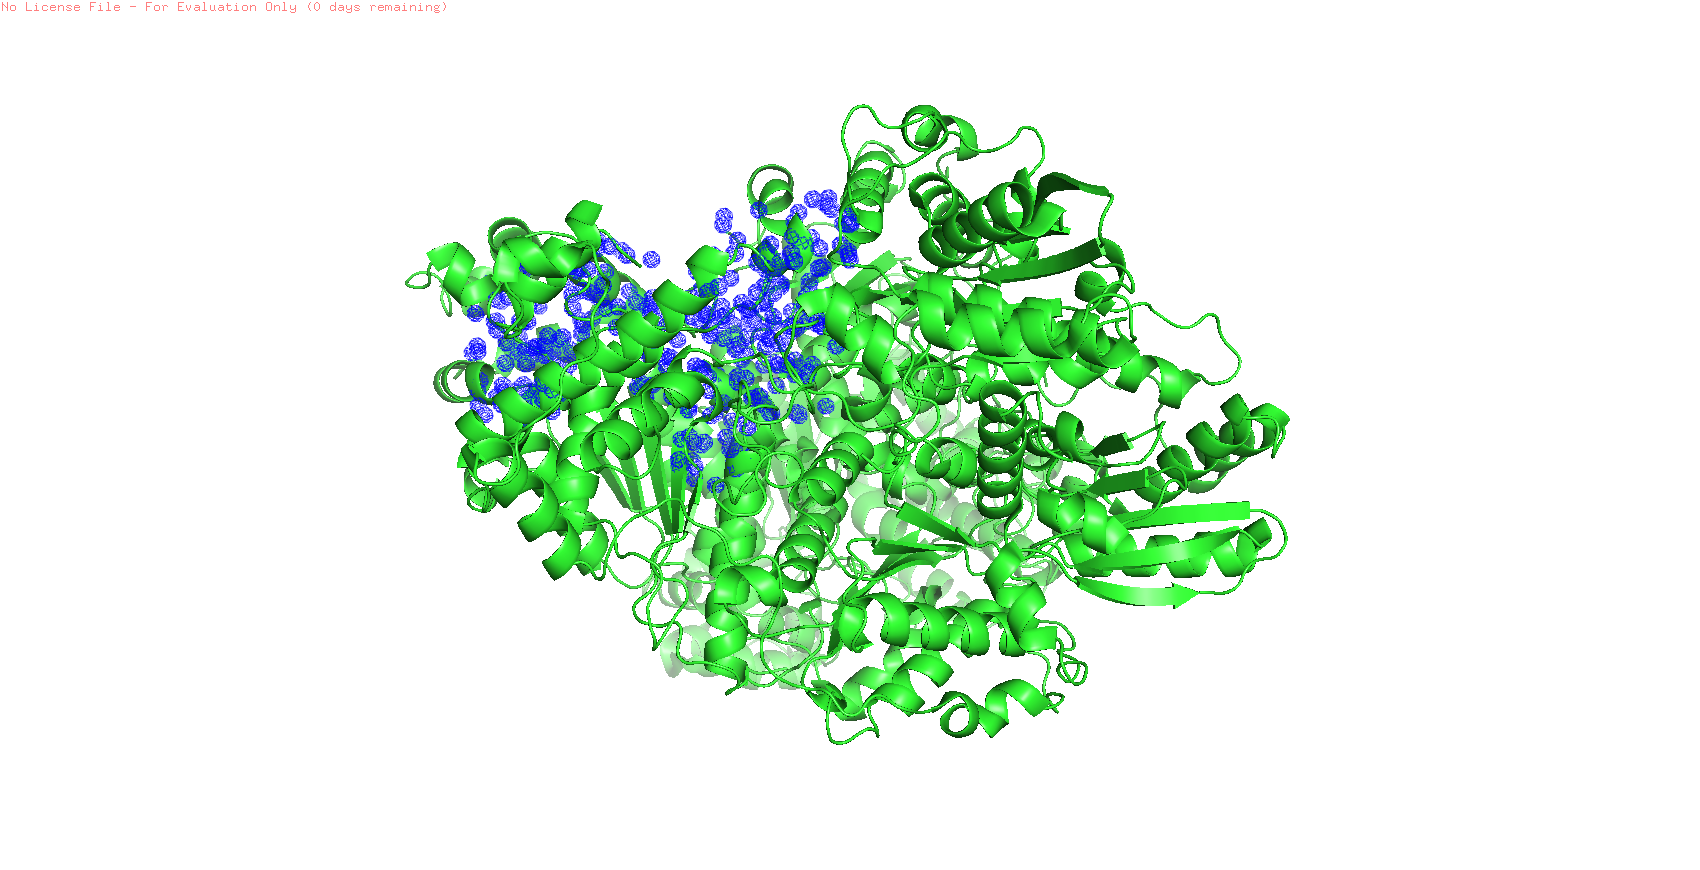

### Full interaction map analysis and hotspot generation

We can use crystallographic information from CSD about non-bonded interactions to generate interaction maps around small molecules or within protein binding site.

In [28]:
protein_settings = InteractionMapAnalysis.ProteinSettings()
output_directory = r'C:\Users\amukhopadhyay\Documents\ccp4_sw2020'
protein_settings.working_directory = output_directory


In [29]:
#by default the settings will detect the cavity in the whole protein, but here we'll set it to False as we've already identified 
#a cavity based on the residues around the ligand
protein_settings.detect_cavities = False
#we will detect cavity from extracted binding site
protein_settings.detect_cavity_from_residues = binding_site_tdp


In [57]:
#Three sources for scatterplot data. 'CSD', 'CSD_SMALL' and 'PDB'. We will use CSD.
protein_settings.source = 'CSD'

In [58]:
#three probes available by default ‘Uncharged NH Nitrogen’, ‘Carbonyl Oxygen’, ‘Aromatic CH Carbon’.
protein_settings.probe_names = ['Carbonyl Oxygen']

In [59]:
protein_settings.calculate_contour_surface = True
protein_settings.rotate_torsions = True #for rotatable OH, NH and  SH  groups 


In [60]:
analyser = InteractionMapAnalysis(settings=protein_settings)
results = analyser.analyse_protein(p_2iea)

In [61]:
protein_hotspots = results.hotspots('Carbonyl Oxygen')
print("{} hotspots found".format(len(protein_hotspots)))
print(protein_hotspots)#higher value indicates stronger hotspots

39 hotspots found
(Hotspot(Coordinates(x=28.697, y=-35.681, z=16.091), 250.66), Hotspot(Coordinates(x=14.701, y=-23.005, z=13.162), 28.27), Hotspot(Coordinates(x=21.769, y=-33.459, z=19.449), 28.01), Hotspot(Coordinates(x=26.553, y=-26.712, z=15.289), 25.03), Hotspot(Coordinates(x=32.573, y=-28.675, z=8.417), 18.68), Hotspot(Coordinates(x=27.350, y=-34.665, z=4.206), 11.92), Hotspot(Coordinates(x=19.514, y=-23.756, z=14.069), 10.78), Hotspot(Coordinates(x=23.809, y=-28.695, z=17.474), 9.65), Hotspot(Coordinates(x=22.402, y=-27.255, z=14.002), 8.06), Hotspot(Coordinates(x=26.603, y=-27.986, z=18.173), 7.84), Hotspot(Coordinates(x=26.601, y=-26.615, z=18.173), 7.71), Hotspot(Coordinates(x=23.785, y=-35.147, z=16.048), 7.34), Hotspot(Coordinates(x=27.553, y=-24.503, z=16.797), 7.17), Hotspot(Coordinates(x=12.836, y=-30.154, z=6.591), 6.16), Hotspot(Coordinates(x=29.475, y=-47.575, z=4.902), 5.79), Hotspot(Coordinates(x=28.031, y=-37.783, z=9.774), 4.22), Hotspot(Coordinates(x=28.691, y=-3

It is possible to convert CSD .acnt map file generated by python API to .ccp4 map format.

In [35]:
acnt_file = r'C:\Users\amukhopadhyay\Documents\ccp4_sw2020\2IEA\Aromatic_CH_Carbon.acnt'

In [36]:
input_file = Grid.from_file(acnt_file)

In [37]:
ccp4_file = 'ar-grid.ccp4'

In [38]:
input_file.write(ccp4_file)

### Protein ligand interaction search

In [39]:
db_file = os.path.join(os.path.dirname(Pharmacophore.default_feature_database_location()), 'pdb_crossminer.csdsqlx')

In [40]:
db = ccdc.io.EntryReader(db_file)

Analysing protein ligand interaction

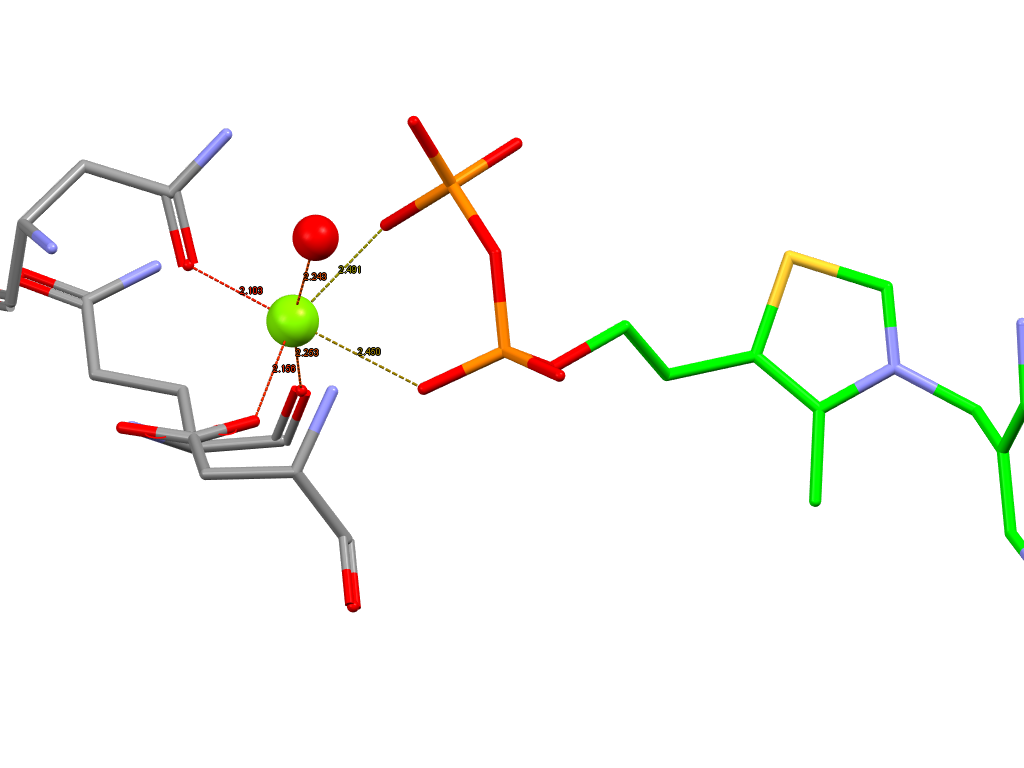

Let's find out there are how many entries in PDB where a carboxylate group bonds a magnesium ion

In [41]:
query = ccdc.search.SubstructureSearch()
magnesium = ccdc.search.SMARTSSubstructure('[Mg]')
magnesium.atoms[0].add_protein_atom_type_constraint('Metal')
sub = query.add_substructure(magnesium)
carboxylate = ccdc.search.SMARTSSubstructure('c(~o)~o')
for a in carboxylate.atoms:
    a.add_protein_atom_type_constraint('Amino')
sub = query.add_substructure(carboxylate)
query.add_distance_constraint('DIST1', (0, 0), (1, 1), (-5, 2), vdw_corrected=True, type='any')
hits = query.search(db)
print(len(hits))

61896


We can actually filter this results to find out how many entries that have a carboxylate group and an aspergine Oxygen atom coordinating the magnesium ion

In [42]:
query = ccdc.search.SubstructureSearch()
query.settings.max_hits_per_structure = 1
magnesium = ccdc.search.SMARTSSubstructure('[Mg]')
magnesium.atoms[0].add_protein_atom_type_constraint('Metal')
sub = query.add_substructure(magnesium)

In [43]:
carboxylate = ccdc.search.SMARTSSubstructure('c(~o)~o')
for a in carboxylate.atoms:
    a.add_protein_atom_type_constraint('Amino')
aspergine = ccdc.search.SMARTSSubstructure('[#7H2X3][#6H0X3](=[OX1])')
for b in aspergine.atoms:
    b.add_protein_atom_type_constraint('Amino')

In [44]:
sub1 = query.add_substructure(carboxylate)
sub2 = query.add_substructure(aspergine)


In [45]:
query.add_distance_constraint('DIST1', (sub, 0), (sub1, 0), (0, 3.0), vdw_corrected=False, type='any')
query.add_distance_constraint('DIST2', (sub, 0), (sub2, 2), (0, 3.0), vdw_corrected=False, type='any')

In [46]:
query.settings.max_hits_per_structure = 1

In [47]:
class WriteHit(ccdc.search.SubstructureSearch.HitProcessor):
    '''Print out the hit id each time we find one'''
    def __init__(self, max_hits=1000):
        self.hits = [] # ccdc.search.SubstructureHit objects
        self.max_hits = max_hits
    def add_hit(self, hit):
        self.hits.append(hit)
        print(hit.identifier, "nhits {}".format(len(self.hits)))
        if len(self.hits) == self.max_hits:
            self.cancel()

In [48]:
hit_writer = WriteHit()

In [49]:
hit_writer.search(query, db) 

1DAY_m1_A_bs_GNP_A_340 nhits 1
1DAW_m1_A_bs_ANP_A_340 nhits 2
1E2S_m1_P_bs_CSN_P_701_2 nhits 3
1E2S_m2_P_bs_CSN_P_701_2 nhits 4
1EC8_m1_D_bs_GLR_D_502 nhits 5
1EHI_m1_A_bs_PHY_A_782 nhits 6
1EHI_m1_A_bs_ADP_A_781 nhits 7
1GSA_m1_A_bs_ADP_A_317 nhits 8
1H1D_m1_A_bs_BIA_A_335 nhits 9
1H1D_m1_A_bs_SAM_A_301 nhits 10
1IOW_m1_A_bs_ADP_A_310 nhits 11
1IOW_m1_A_bs_PHY_A_320 nhits 12
1IOV_m1_A_bs_POB_A_321 nhits 13
1IOV_m1_A_bs_ADP_A_310 nhits 14
1JDF_m1_C_bs_GLR_C_2512 nhits 15
1JDF_m1_A_bs_GLR_A_2510 nhits 16
1JCT_m1_B_bs_GKR_B_502 nhits 17
1JR4_m1_A_bs_CL4_A_301 nhits 18
1MQ4_m1_A_bs_ADP_A_2001 nhits 19
1NI4_m1_A-D_bs_TPP_A_2330 nhits 20
1OLU_m1_A-B_bs_TDP_A_601_2 nhits 21
1OLU_m2_A-B_bs_TDP_A_601_2 nhits 22
1QMZ_m1_A_bs_ATP_A_381 nhits 23
1QMZ_m1_C-D_bs_HIS_F_2 nhits 24
1QMZ_m1_C_bs_ATP_C_381 nhits 25
1QMZ_m1_A-B_bs_HIS_E_2 nhits 26
1UMD_m1_B-C-D_bs_TDP_C_2402 nhits 27
1UMC_m1_B-C-D_bs_TDP_C_2402 nhits 28
1UMC_m1_A-B-D_bs_TDP_A_1402 nhits 29
1UMB_m1_B-C-D_bs_TDP_C_2402 nhits 30
1W85_m1_E-H

5UV4_m1_A_bs_ANP_A_1101 nhits 255
5XFE_m1_A_bs_MPD_A_404_2 nhits 256
5XFE_m2_A_bs_MPD_A_404_2 nhits 257
5X2A_m1_D_bs_ANP_D_1102_2 nhits 258
5X2A_m2_D_bs_ANP_D_1102_2 nhits 259
5XM3_m1_A_bs_PQQ_A_701 nhits 260
5XM3_m1_C_bs_PQQ_C_701 nhits 261
5Z2U_m2_C-D_bs_TD6_C_601_2 nhits 262
5Z2U_m1_C-D_bs_TD6_C_601_2 nhits 263
5Z2U_m1_E-F_bs_TDP_F_601 nhits 264
5Z2U_m1_A-H_bs_TD6_A_601 nhits 265
5Z2U_m1_A-H_bs_TD6_H_601 nhits 266
6F3F_m1_A_bs_ADP_A_601 nhits 267
6FKL_m1_F_bs_ACP_F_402 nhits 268
6GY1_m1_A_bs_FGQ_A_303 nhits 269
6OUW_m1_A_bs_HTL_A_701 nhits 270
6QQN_m1_F_bs_ACP_F_701 nhits 271
6PWK_m1_A_bs_C2E_A_701 nhits 272
6U2G_m1_A-B_bs_ACP_A_901 nhits 273


### Similarity and substructure search

In [50]:
similarity_query = ccdc.search.SimilaritySearch(ligand_tdp)
sim_hits = similarity_query.search(max_hit_structures=15)


In [51]:
for hit in sim_hits:
    print(hit.identifier, hit.similarity)

COYPOX 1.0
THPPTH 1.0
THPPTH01 1.0
THPPTI 1.0
TPYPOP10 1.0
ZIPCEI 1.0
ZIPCIM 1.0
AZITOU 0.906030855539972
COXZUM 0.906030855539972
COYBAV 0.906030855539972
GOBVOI 0.906030855539972
HCCOXE 0.906030855539972
MEMKEU 0.906030855539972
MEMKIY 0.906030855539972
MEMKOE 0.906030855539972


### Protein ligand docking

Let's setup a gold docking run with one of these CSD entries.

In [52]:
from ccdc.docking import Docker
from ccdc.io import MoleculeReader, EntryReader, EntryWriter
from ccdc.protein import Protein
import os

#settings
docker = Docker()
settings = docker.settings
settings.fitness_function = 'plp'
settings.autoscale = 10.
settings.early_termination = False
output_dir = os.path.join(os.getcwd(), 'results')
settings.output_directory = output_dir
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
settings.output_file = 'docked_ligands.mol2'

#protein prep
p_2iea.remove_all_waters()
p_2iea.remove_unknown_atoms()
p_2iea.add_hydrogens()
ligand_file_name = os.path.join(settings.output_directory,'protein_ligand.mol2')
with EntryWriter(ligand_file_name) as writer:
    writer.write(ligand_tdp)
for c in p_2iea.cofactors:
    p_2iea.remove_cofactor(c.identifier)
    
protein_file_name = 'clean_%s.mol2' %p_2iea.identifier
with EntryWriter(protein_file_name) as writer:
    writer.write(p_2iea)
settings.add_protein_file(protein_file_name)

# binding site
ligand = MoleculeReader(ligand_file_name)[0]
protein = settings.proteins[0]
settings.binding_site = settings.BindingSiteFromLigand(protein, ligand, 6.5)

#ligand prep
csd_reader = EntryReader('CSD')
coybav = csd_reader.molecule('COYBAV')
coybav.remove_unknown_atoms()
coybav.assign_bond_types('All')
coybav.standardise_aromatic_bonds()
coybav.standardise_delocalised_bonds()
coybav.add_hydrogens()
coybav_file_name = os.path.join(settings.output_directory,'coybav.mol2')
with EntryWriter(coybav_file_name) as writer:
    writer.write(coybav.heaviest_component)
settings.add_ligand_file(coybav_file_name, 10)

#test for Francis
#settings.add_ligand_file('test_molecules.mol2', 10)

results = docker.dock() 

print(results.return_code)

batch_conf_file = settings.conf_file

settings = Docker.Settings.from_file(batch_conf_file)
results = Docker.Results(settings)
ligands = results.ligands
print(len(ligands))

ligands = results.ligands

first_dock = ligands[0]
print('Gold.PLP.Fitness' in first_dock.attributes)
print('Gold.PLP.part.hbond' in first_dock.attributes)
print('Gold.PLP.part.buried' in first_dock.attributes)

print(first_dock.fitness())
print(first_dock.fitness('plp'))
print(first_dock.fitness(settings.fitness_function))
print(first_dock.fitness(settings.rescore_function))

print(first_dock.scoring_term())
print(first_dock.scoring_term('plp', 'chemscore', 'hbond'))

print(first_dock.hbonds()) 

Starting GOLD with conf file C:\Users\amukhopadhyay\Documents\ccp4_sw2020\api_gold.conf
0
10
True
True
True
73.4635
73.4635
73.4635
73.4635
{'Gold.PLP.Chemscore.CHOScore': 0.0, 'Gold.PLP.Chemscore.Hbond': 2.0776, 'Gold.PLP.Chemscore.Internal.Correction': 0.5219, 'Gold.PLP.Chemscore.Metal': 1.9998, 'Gold.PLP.Fitness': 73.4635, 'Gold.PLP.PLP': -56.355, 'Gold.PLP.ligand.clash': 0.0, 'Gold.PLP.ligand.torsion': 0.8224, 'Gold.PLP.part.buried': -2.2781, 'Gold.PLP.part.hbond': -2.8118, 'Gold.PLP.part.metal': -2.0, 'Gold.PLP.part.nonpolar': -51.4388, 'Gold.PLP.part.repulsive': 0.3179}
2.0776
(HBond(Atom(N4)-Atom(H6)-Atom(O)), HBond(Atom(O1)-Atom(H9)-Atom(OD2)), HBond(Atom(NE2)-Atom(HE21)-Atom(O2)), HBond(Atom(ND2)-Atom(HD21)-Atom(O3)), HBond(Atom(MG)-Atom(O1)), HBond(Atom(MG)-Atom(O3)))
